In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("reviews_data.csv").dropna()

In [2]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,product_category
0,US,32908537,R25Z46X8FXZQM0,B005LD2BAI,801608094,Incredible Inc. Cleaner; Stain Remover; Deodor...,5,0,0,N,Y,It really is INCREDIBLE!!,This is the best stuff ever!! It cleans pet st...,15953,2013,Home
1,US,29266849,R11PEZB5ENERJ0,B000HK1OOY,650003661,Dr. Bronner's Pure-Castile Liquid Soap - Baby ...,5,0,0,N,Y,Changed my life,I will never buy another soap again. I use th...,15894,2013,Beauty
2,US,12848580,RIX49JNVH1TGW,B004JK9CKG,5899548,Top Performance ProDental Dental Spray — Easy-...,5,1,1,N,Y,Prodental spray,"works great, helps alot with smelly dog breath...",16141,2014,Pet_Products
3,US,49493237,R1SGJCCEN0GCPH,B002KQLUVU,89308012,BB-8520,5,0,0,N,Y,Perfect Device,The perfect device for a new technology,16340,2014,Wireless
4,US,48132869,R226MO6DFUWR4K,767921968,731560606,It's Called a Breakup Because It's Broken: The...,5,4,5,N,Y,You are awesome and he's an idiot,You're looking up books like this and reading ...,15534,2012,Books


In [3]:
variables = df[['product_title','star_rating','helpful_votes',
                'total_votes', 'vine', 'verified_purchase',
                'review_headline', 'review_body', 'review_date', 'year', 'product_category']]

In [4]:
variables['review_wordcnt'] = variables['review_body'].map(lambda x : len(str(x).split()))

C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


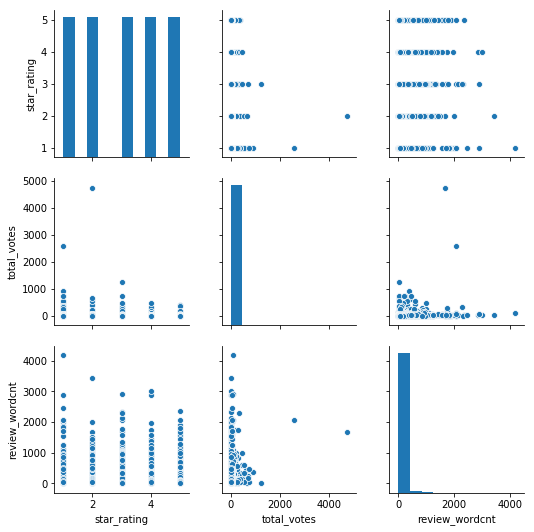

In [5]:
ppCols = variables[['star_rating', 'total_votes', 'review_wordcnt']]

sns.pairplot(ppCols)

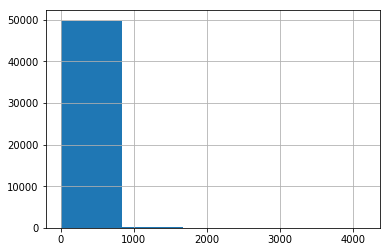

In [6]:
variables['review_wordcnt'].hist(bins = 5)

It seems that there a number of outliers that are skewing our data quit a bit lets set a limit on the word count and the number of votes for a review to get a better picture of the data

In [7]:
variables = variables.loc[variables['review_wordcnt']<900]
variables = variables.loc[variables['review_wordcnt']>0]
varialbes = variables.loc[variables['total_votes']<900]
variables.max()

product_title        日本語版 PACE Anti-Piracy, iLok 2
star_rating                                      5
helpful_votes                                 1120
total_votes                                   1238
vine                                             Y
verified_purchase                                Y
review_headline                           １６ｍｍではなく
review_body                                      😞
review_date                                  16678
year                                          2015
product_category                          Wireless
review_wordcnt                                 899
dtype: object

In [8]:
print("without outliers: ", len(variables))
print("with outliers: ", len(df))

without outliers:  49832
with outliers:  49999


removing the outliers we only drop ~175 entries

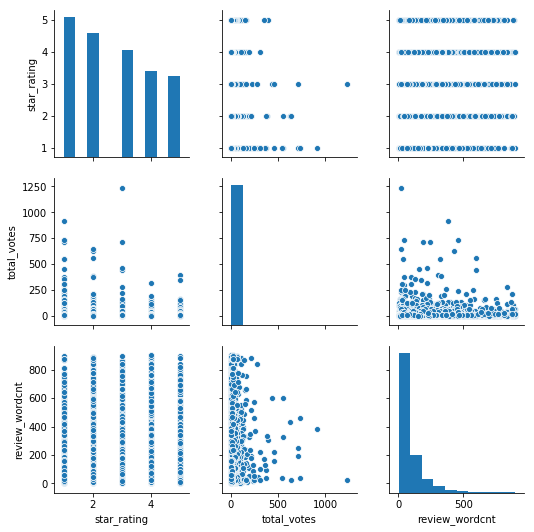

In [9]:
ppCols = variables[['star_rating', 'total_votes', 'review_wordcnt']]
sns.pairplot(ppCols[ppCols['total_votes']>0])

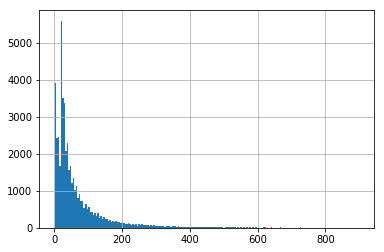

In [10]:
variables['review_wordcnt'].hist(bins = 200)

Data is still pretty skewed left which makes sense concidering most people that give reivews are not writing very long reviews (more than 200 words) so lets zoom in some more

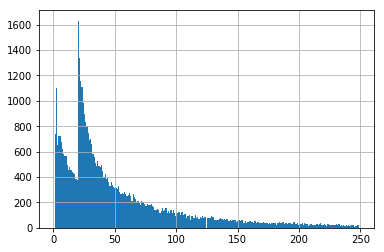

In [11]:
variables[variables['review_wordcnt'] < 250]['review_wordcnt'].hist(bins = 250)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
corpus = df['review_body']

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=15, 
    stop_words='english', ngram_range=(1,2))

features = vectorizer.fit_transform(corpus).toarray()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer(min_df=15, stop_words='english').fit(corpus)
dictionary = countVec.transform(corpus)
sum_words = dictionary.sum(axis=0) 

In [17]:
word_frequency = []

for word, i in countVec.vocabulary_.items():
    word_frequency.append((word, sum_words[0, i]))
    
word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)

In [18]:
x,y = zip(*word_frequency)


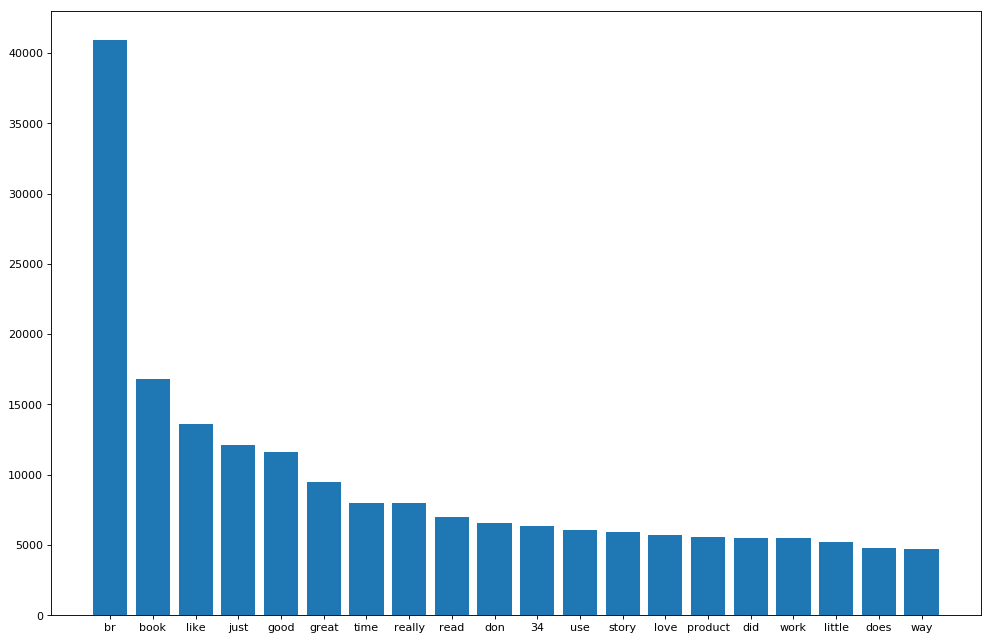

In [28]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plotx = x[:20]
ploty = y[:20]
plt.bar(plotx, ploty)
plt.show()